In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver

url = "https://en.m.wikipedia.org/wiki/2016_United_States_presidential_election"

driver = webdriver.Chrome("/Users/gavin/Downloads/chromedriver_win32/chromedriver") 
driver.get(url)
content = driver.page_source

soup = BeautifulSoup(content, "html.parser")
table = soup.find("div", {"style": "overflow:auto"}).find("table", {"class": "wikitable sortable jquery-tablesorter"})

table_data = pd.read_html(str(table))
data_list = table_data[0].values.tolist()
data_list = data_list[2:]
selected_columns = [row[0:3] + row[4:6] + row[7:9] for row in data_list]
results_2016 = pd.DataFrame(selected_columns, columns=['State', 'Democratic Votes', 'Dem_%', 'Republican Votes', 'Rep_%', 'Libertarian', 'Lib_%'])

print(results_2016.head(10))

driver.quit()

    State Democratic Votes   Dem_% Republican Votes   Rep_% Libertarian  Lib_%
0   Ariz.          1161167  44.58%          1252401  48.08%      106327  4.08%
1    Ark.           380494  33.65%           684872  60.57%       29949  2.64%
2  Calif.          8753788  61.73%          4483810  31.62%      478500  3.37%
3   Colo.          1338870  48.16%          1202484  43.25%      144121  5.18%
4   Conn.           897572  54.57%           673215  40.93%       48676  2.96%
5    Del.           235603  53.09%           185127  41.72%       14757  3.32%
6    D.C.           282830  90.86%            12723   4.09%        4906  1.57%
7    Fla.          4504975  47.82%          4617886  49.02%      207043  2.20%
8     Ga.          1877963  45.64%          2089104  50.77%      125306  3.05%
9  Hawaii           266891  62.22%           128847  30.03%       15954  3.72%


In [2]:

url = "https://en.wikipedia.org/wiki/2020_United_States_presidential_election"

driver = webdriver.Chrome("/Users/gavin/Downloads/chromedriver_win32/chromedriver")

driver.get(url)

content = driver.page_source

soup = BeautifulSoup(content, "html.parser")

table = soup.find("div", {"style": "overflow:auto"}).find("table", {"class": "wikitable sortable jquery-tablesorter"})

table_data = pd.read_html(str(table))
data_list = table_data[0].values.tolist()
data_list = data_list[2:]
selected_columns = [row[0:3] + row[4:6] + row [7:9] for row in data_list]
results_2020 = pd.DataFrame(selected_columns, columns=['State', 'Democratic Votes', 'Dem_%', 'Republican Votes', 'Rep_%','Libertarian', 'Lib_%'])
print(results_2020.head(5))

driver.quit()

     State Democratic Votes   Dem_% Republican Votes   Rep_% Libertarian  \
0  Arizona          1672143  49.36%          1661686  49.06%       51465   
1     Ark.           423932  34.78%           760647  62.40%       13133   
2   Calif.         11110639  63.48%          6006518  34.32%      187910   
3    Colo.          1804352  55.40%          1364607  41.90%       52460   
4    Conn.          1080831  59.26%           714717  39.19%       20230   

   Lib_%  
0  1.52%  
1  1.08%  
2  1.07%  
3  1.61%  
4  1.11%  


In [3]:
results_2016['Winner'] = results_2016.apply(lambda row: 'Democrats' if row['Dem_%'] > row['Rep_%'] else 'Republican', axis=1)
   
print(results_2016.head(10))

    State Democratic Votes   Dem_% Republican Votes   Rep_% Libertarian  \
0   Ariz.          1161167  44.58%          1252401  48.08%      106327   
1    Ark.           380494  33.65%           684872  60.57%       29949   
2  Calif.          8753788  61.73%          4483810  31.62%      478500   
3   Colo.          1338870  48.16%          1202484  43.25%      144121   
4   Conn.           897572  54.57%           673215  40.93%       48676   
5    Del.           235603  53.09%           185127  41.72%       14757   
6    D.C.           282830  90.86%            12723   4.09%        4906   
7    Fla.          4504975  47.82%          4617886  49.02%      207043   
8     Ga.          1877963  45.64%          2089104  50.77%      125306   
9  Hawaii           266891  62.22%           128847  30.03%       15954   

   Lib_%      Winner  
0  4.08%  Republican  
1  2.64%  Republican  
2  3.37%   Democrats  
3  5.18%   Democrats  
4  2.96%   Democrats  
5  3.32%   Democrats  
6  1.57%   De

In [4]:
results_2020['Winner'] = results_2020.apply(lambda row: 'Democrats' if row['Dem_%'] > row['Rep_%'] else 'Republican', axis=1)

print(results_2020.head(5))

     State Democratic Votes   Dem_% Republican Votes   Rep_% Libertarian  \
0  Arizona          1672143  49.36%          1661686  49.06%       51465   
1     Ark.           423932  34.78%           760647  62.40%       13133   
2   Calif.         11110639  63.48%          6006518  34.32%      187910   
3    Colo.          1804352  55.40%          1364607  41.90%       52460   
4    Conn.          1080831  59.26%           714717  39.19%       20230   

   Lib_%      Winner  
0  1.52%   Democrats  
1  1.08%  Republican  
2  1.07%   Democrats  
3  1.61%   Democrats  
4  1.11%   Democrats  


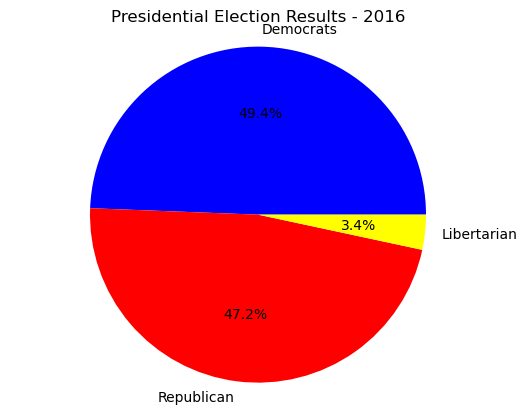

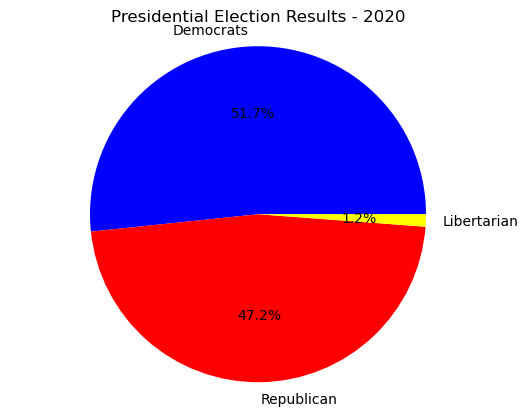

In [5]:
import matplotlib.pyplot as plt

dem_percentage = float(results_2016.at[54, 'Dem_%'].strip('%'))
rep_percentage = float(results_2016.at[54, 'Rep_%'].strip('%'))
lib_percentage = float(results_2016.at[54, 'Lib_%'].strip('%'))

percentages = [dem_percentage, rep_percentage, lib_percentage]
parties = ['Democrats', 'Republican', 'Libertarian']
colors = ['blue', 'red', 'yellow']

plt.pie(percentages, labels=parties, colors=colors, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Presidential Election Results - 2016')

plt.show()


dem_percentage = float(results_2020.at[54, 'Dem_%'].strip('%'))
rep_percentage = float(results_2020.at[54, 'Rep_%'].strip('%'))
lib_percentage = float(results_2020.at[54, 'Lib_%'].strip('%'))

percentages = [dem_percentage, rep_percentage, lib_percentage]
parties = ['Democrats', 'Republican', 'Libertarian']
colors = ['blue', 'red', 'yellow']

plt.pie(percentages, labels=parties, colors=colors, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Presidential Election Results - 2020')

plt.show()


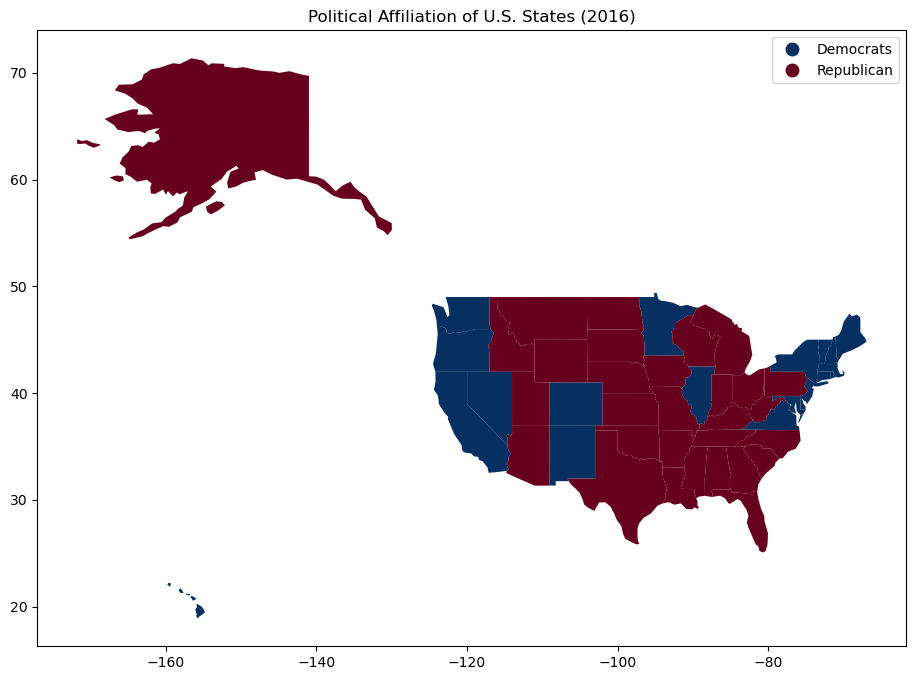

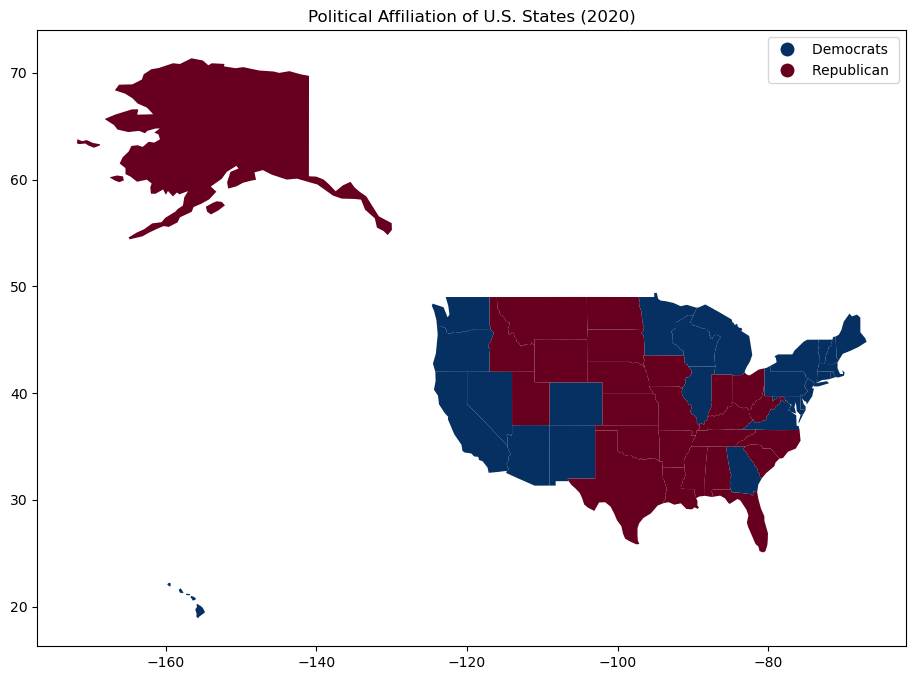

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

data= pd.read_excel('Python project State Data.xlsx')
gdf = gpd.read_file('ne_110m_admin_1_states_provinces.shp')
merged_gdf = gdf.merge(data, left_on="name", right_on="State ", how="left")

fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(ax=ax, column="2016_Result", cmap="RdBu_r", legend=True)
plt.title("Political Affiliation of U.S. States (2016)")
plt.show()


fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(ax=ax, column="2020_Result ", cmap="RdBu_r", legend=True)
plt.title("Political Affiliation of U.S. States (2020)")
plt.show()

In [7]:
excel_file = "C:/Users/gavin/OneDrive/Documents/Python project State Data.xlsx"

compiled_data = pd.read_excel(excel_file)

print(compiled_data)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6) 
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', None) 

            State  2016_Result 2020_Result   2016_Voter_Turnout  \
0          Alabama  Republican  Republican                 56.3   
1           Alaska  Republican  Republican                 57.4   
2          Arizona  Republican   Democrats                 48.9   
3         Arkansas  Republican  Republican                 49.4   
4       California   Democrats   Democrats                 47.0   
5         Colorado   Democrats   Democrats                 64.6   
6      Connecticut   Democrats   Democrats                 58.3   
7         Delaware   Democrats   Democrats                 59.2   
8          Florida  Republican  Republican                 56.9   
9          Georgia  Republican   Democrats                 52.6   
10          Hawaii   Democrats   Democrats                 38.3   
11           Idaho  Republican  Republican                 55.0   
12        Illinois   Democrats   Democrats                 56.1   
13         Indiana  Republican  Republican                 54.

In [8]:
compiled_data.columns = compiled_data.columns.str.strip()

combined_average_turnout = compiled_data[['2016_Voter_Turnout', '2020_Voter_Turnout']].mean().mean()


above_average_turnout = compiled_data[(compiled_data['2016_Voter_Turnout'] > combined_average_turnout) &
                           (compiled_data['2020_Voter_Turnout'] > combined_average_turnout)]


correlation_2016 = above_average_turnout['2016_Result'].value_counts(normalize=True)
correlation_2020 = above_average_turnout['2020_Result'].value_counts(normalize=True)

print("Combined Average Turnout:", combined_average_turnout)
print("\nCorrelation of 2016 Result:")
print(correlation_2016)
print("\nCorrelation of 2020 Result:")
print(correlation_2020)

Combined Average Turnout: 62.26

Correlation of 2016 Result:
Democrats     0.714286
Republican    0.285714
Name: 2016_Result, dtype: float64

Correlation of 2020 Result:
Democrats      0.857143
Republican     0.142857
Name: 2020_Result, dtype: float64


In [9]:
compiled_data['2016_Median_Age'] = pd.to_numeric(compiled_data['2016_Median_Age'], errors='coerce')
compiled_data['2020_Median_Age'] = pd.to_numeric(compiled_data['2020_Median_Age'], errors='coerce')


average_age_2016 = compiled_data['2016_Median_Age'].mean()
average_age_2020 = compiled_data['2020_Median_Age'].mean()
average_age_combined = (average_age_2016 + average_age_2020) / 2

print("Average Age (2016):", average_age_2016)
print("Average Age (2020):", average_age_2020)
print("Average Age (Combined):", average_age_combined)

Average Age (2016): 38.242
Average Age (2020): 38.647999999999996
Average Age (Combined): 38.44499999999999


In [10]:
compiled_data['2016_Result'] = compiled_data['2016_Result'].map({'Republican': 1, 'Democrats': -1})

correlation = compiled_data['2016_Median_Age'].corr(compiled_data['2016_Result'])

print(f"Correlation between older than average population and voting result in 2016: {correlation}")

Correlation between older than average population and voting result in 2016: -0.32001857789538174


In [11]:
compiled_data['Income_Increase'] = compiled_data['2020_Average_Income'] - compiled_data['2016_Average_Income']
average_increase = compiled_data['Income_Increase'].mean()

print(f"The average increase in income between 2016 and 2020 is: {average_increase}")

The average increase in income between 2016 and 2020 is: 7180.76


In [12]:
above_average_states = compiled_data[compiled_data['Income_Increase'] > average_increase]

party_percentage = above_average_states['2020_Result'].value_counts(normalize=True) * 100

print(f"Percentage of states with an above-average income increase for each party:")
print(party_percentage)

Percentage of states with an above-average income increase for each party:
Democrats      78.26087
Republican     21.73913
Name: 2020_Result, dtype: float64


In [13]:
excel_file = "C:/Users/gavin/OneDrive/Desktop/Wisconsin_Pop_Data.xlsx"

Wisconsin_Data = pd.read_excel(excel_file)

print(Wisconsin_Data)
pd.set_option('display.max_columns', None)

       County  Pop_Density Voting_Outcome
0       Adams         29.9     Republican
1     Ashland          7.0      Democrats
2      Barron         51.4     Republican
..        ...          ...            ...
69   Waushara         38.3     Republican
70  Winnebago        291.1     Republican
71       Wood         91.7     Republican

[72 rows x 3 columns]


In [14]:
from sklearn.cluster import KMeans

df = (Wisconsin_Data)

X = df[['Pop_Density']] 
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)
df['Cluster'] = kmeans.labels_ 

cluster_outcomes = df.groupby('Cluster')['Voting_Outcome'].value_counts()

print(cluster_outcomes)


C:\Users\gavin\New folder\envs\Dataman3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gavin\New folder\envs\Dataman3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster  Voting_Outcome
0        Republican         7
         Democrats          4
1        Republican        51
         Democrats         10
Name: Voting_Outcome, dtype: int64


In [15]:
print(results_2020.iloc[52])

State                    Wis.
Democratic Votes      1630866
Dem_%                  49.45%
                      ...    
Libertarian             38491
Lib_%                   1.17%
Winner              Democrats
Name: 52, Length: 8, dtype: object
